In [1]:
from gmbp_common.utils.notebook_utils import set_width_global, disable_auto_scroll
set_width_global()
disable_auto_scroll()

import gmbp_common.utils.datetime_utils as dtu
from gmbp_quant.research.crypto.dca.dca import calc_dca, get_historical_prices, calc_bias

import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>

## Get Historical Prices

In [2]:
historical_prices = get_historical_prices(symbol='ETHUSD', data_source='FMP')

<AxesSubplot:xlabel='date'>

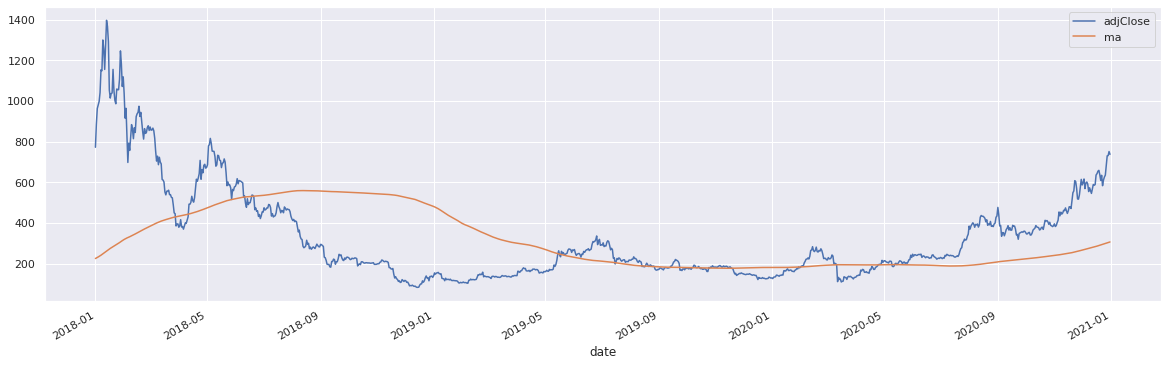

In [6]:
start_dateid = 20180101
end_dateid = 20201231
ma_ndays = 365

hp = calc_bias(daily_prices=historical_prices, ma_ndays=ma_ndays, close_price_col='adjClose')
hp.set_index('date').loc[dtu.dateid_to_datestr(start_dateid, sep='-'):dtu.dateid_to_datestr(end_dateid, sep='-')][['adjClose','ma']].plot(figsize=(20,6))

## DCA by FIXED_AMOUNT

In [11]:
config = {'strategy': 'FIXED_AMOUNT',
          'ma_ndays': ma_ndays,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'growth_rate': 0.6}

dca_fixed_amount = calc_dca(historical_prices=historical_prices, config=config)
dca_fixed_amount.tail()

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1090,2020-12-27,682.642334,6,300.677737,1.270345,0.389593,0.466540,1.887840,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1091,2020-12-28,730.397339,0,302.327257,1.415916,0.394278,0.468238,2.181879,1.0,100.0,0.097794,49.134771,35887.905688,15700.0,2.285854,3,100.387051,34518.240777
1092,2020-12-29,731.520142,1,303.962222,1.406615,0.398841,0.469968,2.144349,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1093,2020-12-30,751.618958,2,305.658072,1.459019,0.403579,0.471916,2.236500,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1094,2020-12-31,737.803406,3,307.324353,1.400732,0.408203,0.473397,2.096610,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

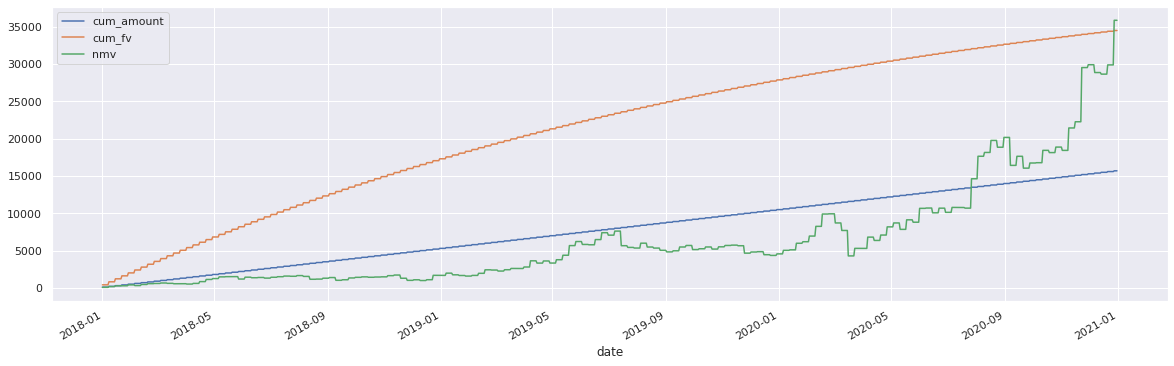

In [12]:
dca_fixed_amount.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))

## DCA by BIAS_GRID_EQUAL_SIZE (long only)

In [17]:
config = {'strategy': 'BIAS_GRID_EQUAL_SIZE',
          'ma_ndays': ma_ndays,
          'allow_sell': False,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'investment_ratio_interval': 0.3,
          'growth_rate': 0.8}

dca_bges_long = calc_dca(historical_prices=historical_prices, config=config)
dca_bges_long.tail()

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1090,2020-12-27,682.642334,6,300.677737,1.270345,0.389593,0.466540,1.887840,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1091,2020-12-28,730.397339,0,302.327257,1.415916,0.394278,0.468238,2.181879,0.0,0.0,0.0,76.067971,55559.843735,17890.0,3.105637,3,0.0,53322.678475
1092,2020-12-29,731.520142,1,303.962222,1.406615,0.398841,0.469968,2.144349,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1093,2020-12-30,751.618958,2,305.658072,1.459019,0.403579,0.471916,2.236500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1094,2020-12-31,737.803406,3,307.324353,1.400732,0.408203,0.473397,2.096610,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

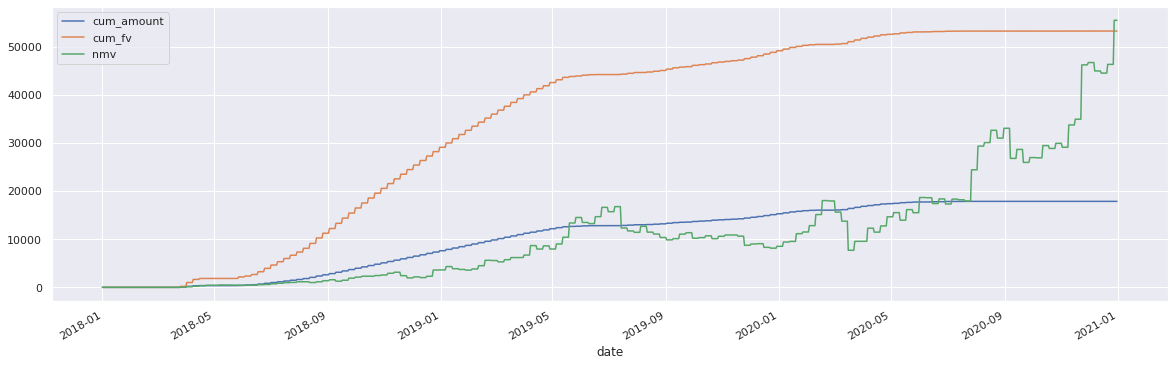

In [18]:
dca_bges_long.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))

## DCA by BIAS_GRID_EQUAL_SIZE (allow sell)

In [25]:
config = {'strategy': 'BIAS_GRID_EQUAL_SIZE',
          'ma_ndays': ma_ndays,
          'allow_sell': True,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'investment_ratio_interval': 0.3,
          'growth_rate': 0.85}

dca_bges = calc_dca(historical_prices=historical_prices, config=config)
dca_bges.tail()

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1090,2020-12-27,682.642334,6,300.677737,1.270345,0.389593,0.466540,1.887840,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1091,2020-12-28,730.397339,0,302.327257,1.415916,0.394278,0.468238,2.181879,-0.8,-80.0,-0.078235,71.585155,52285.606639,15310.0,3.415128,3,-80.40553,50831.577847
1092,2020-12-29,731.520142,1,303.962222,1.406615,0.398841,0.469968,2.144349,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1093,2020-12-30,751.618958,2,305.658072,1.459019,0.403579,0.471916,2.236500,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1094,2020-12-31,737.803406,3,307.324353,1.400732,0.408203,0.473397,2.096610,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

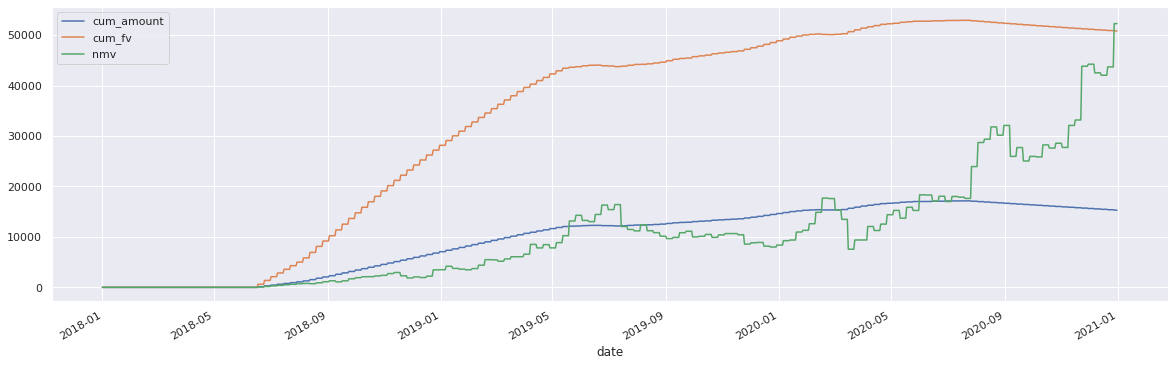

In [26]:
dca_bges.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))